In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Image

In [ ]:
def TR(imagen):
    imagen_hsv =cv2.cvtColor(cv2.imread(imagen), cv2.COLOR_BGR2HSV)

    f, c, num_canal = imagen_hsv.shape

    thr = cv2.adaptiveThreshold(cv2.imread(imagen,0),255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,11,2)

    for i in range(0, f):
        for j in range(0, c):
            if thr[i,j] == 0:
                imagen_hsv[i, j, 2] = 0

    imagen_bgr = cv2.cvtColor(imagen_hsv, cv2.COLOR_HSV2BGR)

    imagen_rgb = cv2.cvtColor(imagen_bgr, cv2.COLOR_BGR2RGB)


    plt.subplots(1, 3, figsize=(10,10))
    plt.subplot(311)
    plt.imshow(cv2.cvtColor(cv2.imread(imagen), cv2.COLOR_BGR2RGB))
    plt.subplot(312)
    plt.imshow(thr,cmap='gray')
    plt.subplot(313)
    plt.imshow(imagen_rgb)
    plt.show()

    return imagen_bgr

In [ ]:
def Mean_RGB(imagen,umbral_s,umbral_v):
    imagen_hsv =cv2.cvtColor(imagen, cv2.COLOR_BGR2HSV)

    f, c, num_canal = imagen_hsv.shape

    cuadrado_h = []
    cuadrado_s = []
    cuadrado_v = []

    for i in range(0, f):
        for j in range(0, c):
            if imagen_hsv[i, j, 1] > umbral_s and imagen_hsv[i, j, 2] > umbral_v and (imagen_hsv[i, j, 0] < 31 or imagen_hsv[i, j, 0] > 149):
                if imagen_hsv[i, j, 0] > 149:
                    temp = imagen_hsv[i, j, 0] - 180
                    cuadrado_h.append(temp)
                else:
                    cuadrado_h.append(imagen_hsv[i, j, 0])
                cuadrado_s.append(imagen_hsv[i, j, 1])
                cuadrado_v.append(imagen_hsv[i, j, 2])

    cuadrado_h = np.array(cuadrado_h)
    cuadrado_s = np.array(cuadrado_s)
    cuadrado_v = np.array(cuadrado_v)

    h = int(cuadrado_h.mean())
    s = int(cuadrado_s.mean())
    v = int(cuadrado_v.mean())

    if h < 0:
        h = 180 + h

    cuadrado_hsv = np.zeros((1, 1, 3), dtype=np.uint8)
    cuadrado_hsv[0, 0, 0] = h
    cuadrado_hsv[0, 0, 1] = s
    cuadrado_hsv[0, 0, 2] = v

    imagen_bgr = cv2.cvtColor(cuadrado_hsv, cv2.COLOR_HSV2BGR)

    imagen_rgb = cv2.cvtColor(imagen_bgr, cv2.COLOR_BGR2RGB)

    print('R:',imagen_rgb[0,0,0], ' G:',imagen_rgb[0,0,1],'BV:',imagen_rgb[0,0,2])

    plt.subplots(1, 3, figsize=(10,10))
    plt.subplot(121)
    plt.imshow(cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB))
    plt.subplot(122)
    plt.imshow(imagen_rgb)
    plt.show()

R: 181  G: 104 BV: 130


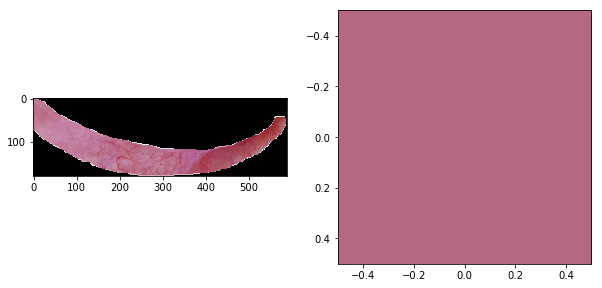

In [ ]:
Mean_RGB(cv2.imread('Database Anemia/Full Data/recortado.png'), 40, 40)

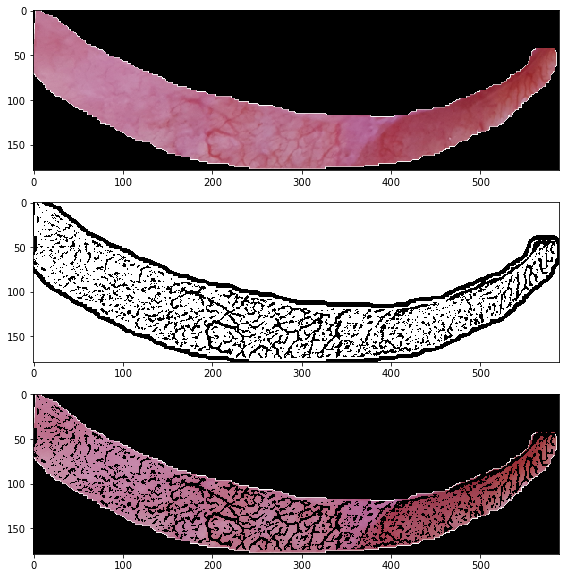

In [ ]:
im = TR('Database Anemia/Full Data/recortado.png')

R: 184  G: 108 BV: 136


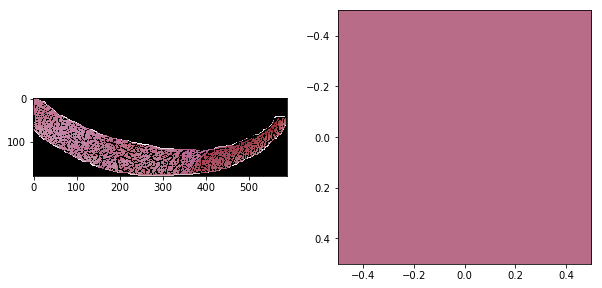

In [ ]:
Mean_RGB(im, 40, 40)